In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression

In [3]:
covid_data=pd.read_csv('owid-covid-data.csv')

In [3]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,UGA,Africa,Uganda,3/22/2020,1,1,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516
1,UGA,Africa,Uganda,3/23/2020,1,0,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516
2,UGA,Africa,Uganda,3/24/2020,9,8,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516
3,UGA,Africa,Uganda,3/25/2020,9,0,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516
4,UGA,Africa,Uganda,3/26/2020,14,5,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516


In [4]:
data=covid_data

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,UGA,Africa,Uganda,3/22/2020,1,1,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516
1,UGA,Africa,Uganda,3/23/2020,1,0,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516
2,UGA,Africa,Uganda,3/24/2020,9,8,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516
3,UGA,Africa,Uganda,3/25/2020,9,0,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516
4,UGA,Africa,Uganda,3/26/2020,14,5,NaN,NaN,0,NaN,...,1697.707,41.6,213.333,2.5,3.4,16.7,21.222,0.5,63.37,0.516


In [12]:
yat=np.linspace(0,247,248)
yat=pd.DataFrame(yat)

In [7]:

y=np.log(data['total_cases'])

In [8]:
#we replace the inf values with zero 
a=y.sum()
for i in range(len(y)):
    if y[i]==a:
        y[i]=0

In [9]:
#fit the data to a linear model
lr=LinearRegression().fit(yat,y)
beta=lr.coef_[0]
c=lr.intercept_


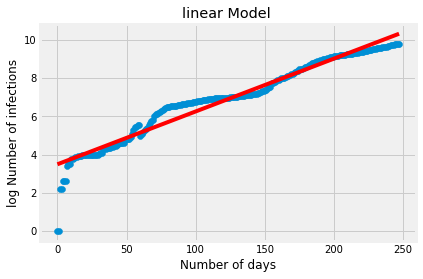

In [10]:
#pefrom a scatter plot plus the plot of the line of best fit of our linear model
plt.scatter(yat,y)
plt.plot(yat,beta*yat+c,color='red')
plt.title('linear Model ')
plt.ylabel('log Number of infections')
plt.xlabel('Number of days')
plt.show()

$ln(I_{t})=ln(I_{0}) + \kappa t$ \\\\ from, \\\ $I_{t}=I_{0} \exp^{\beta t}$

In [11]:
#intital number of infected individuals
I_0=np.exp(c)
I_0


33.00162486219306

In [12]:
#rate of infection
beta


0.027631126937781518

In [95]:
#we approximate the removal rate from the total deaths data
#from literature we note that the death rate in uganda has been put at 12%
ydeath=data['total_deaths']
ydeath=pd.DataFrame(ydeath,columns=['total_deaths'])

In [96]:
ydeath=[ydeath['total_deaths'][i] for i in range(len(ydeath)) if str(ydeath['total_deaths'][i])!='nan']
ydeath2=ydeath

In [97]:
ydeath=np.log(ydeath)


In [98]:
yat2=np.linspace(0,len(ydeath)-1,len(ydeath))
yat2=pd.DataFrame(yat2)

$ln(ydeath_{t})=ln(ydeath_{0}) + \kappa t$ \\\\ from, \\\ $y_{t}=y_{0} \exp^{\kappa t}$

In [99]:
#fitthe data to alinear model
tr=LinearRegression().fit(yat2,ydeath)
k1=tr.coef_[0]
tau=k1*100/12 #death rate is stated to be 12% of infected people in literature
tau

0.27456225300329723

In [100]:
h=lr.intercept_

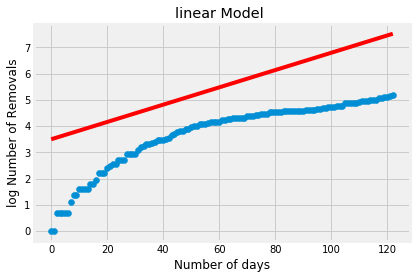

In [101]:
#pefrom a scatter plot plus the plot of the line of best fit of our linear model for total deaths
plt.scatter(yat2,ydeath)
plt.plot(yat2,k1*yat2+h,color='red')
plt.title('linear Model ')
plt.ylabel('log Number of Removals')
plt.xlabel('Number of days')
plt.show()

In [105]:
#training Autoregresive model to model our data
#linear model in previous example didnt fit the data well.
from statsmodels.tsa.arima_model import ARIMA
import statsmodels
model=ARIMA(ydeath,order=(2,0,2))
result=model.fit()
pred=result.predict(start=len(ydeath2),end=len(ydeath)+30)
#predmaz=ydeath.append(pred)
result.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  123
Model:                     ARMA(2, 2)   Log Likelihood                 110.541
Method:                       css-mle   S.D. of innovations              0.096
Date:                Tue, 15 Dec 2020   AIC                           -209.083
Time:                        02:05:11   BIC                           -192.210
Sample:                             0   HQIC                          -202.229
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6758      2.577      1.039      0.301      -2.374       7.726
ar.L1.y        0.0036      0.022      0.163      0.871      -0.040       0.047
ar.L2.y        0.9945      0.022     44.797      0.000       0.951       1.038
ma.L1.y        1.1871      0.089     13.344      0.000       1.013       1.361
ma.L2.y        0.1871      0.091      2.064      0.041       0.009       0.365
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2           -1.0046           +0.0000j            1.0046            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2           -5.3454           +0.0000j            5.3454            0.5000
-----------------------------------------------------------------------------
"""

In [45]:
T=1000;
m=10000;
h=T/m;
t=np.linspace(0,T,m+1)
a=50000
A=500000
umax=0.9
beta=0.022
k=1/14;
tau=0.220;
mu=1/60*365;
alpha=0.99993*mu;
n=0.9;
h2=h/2; h6=h/6;

S=[0]*len(t)
E=[0]*len(t)
I=[0]*len(t)
R=[0]*len(t)

SC=[0]*len(t)
EC=[0]*len(t)
IC=[0]*len(t)
RC=[0]*len(t)

U=[0]*len(t)
LS=[0]*len(t)
LE=[0]*len(t)
LI=[0]*len(t)
LR=[0]*len(t)
S[0]=0.999978
E[0]=0
I[0]=0.000022
R[0]=0
SC[0]=0.999978
EC[0]=0
IC[0]=0.000022
RC[0]=0
error=0.1

In [46]:
def rungekutta_4th(s,e,i,r,h):

    #first parameter
    sk1=alpha-beta*(e+i)*s-mu*s;
    ek1=beta*(e+i)*s-k*e-mu*e;
    ik1=k*e-tau*i-mu*i;
    rk1=tau*i-n*mu*r;
    #second parameter
    s2=s+(h2*sk1); e2=e+(h2*ek1); i2=i+(h2*ik1); r2=r+(h2*rk1);
    sk2=alpha-beta*(e2+i2)*s2-mu*s2;
    ek2=beta*(e2+i2)*s2-k*e2-mu*e2;
    ik2=k*e2-tau*i2-mu*i2;
    rk2=tau*i2-n*mu*r2;
    #third parameter
    s3=s+h2*sk2; e3=e+h2*ek2; i3=i+h2*ik2; r3=r+h2*rk2;
    sk3=alpha-beta*(e3+i3)*s3-mu*s3;
    ek3=beta*(e3+i3)*s3-k*e3-mu*e3;
    ik3=k*e3-tau*i3-mu*i3;
    rk3=tau*i3-n*mu*r3;
    #fourth parameter
    s4=s+h*sk3; e4=e+h*ek3; i4=i+h*ik3; r4=r+h*rk3;
    sk4=alpha-beta*(e4+i4)*s4-mu*s4;
    ek4=beta*(e4+i4)*s4-k*e4-mu*e4;
    ik4=k*e4-tau*i4-mu*i4;
    rk4=tau*i4-n*mu*r4;

    S=s+h6*(sk1+2*sk2+2*sk3+sk4);
    E=e+h6*(ek1+2*ek2+2*ek3+ek4);
    I=s+h6*(ik1+2*ik2+2*ik3+ik4);
    R=s+h6*(rk1+2*rk2+2*rk3+rk4);
    return (S,E,I,R)


In [47]:
def rungekutta4thwithcontrol(s,e,i,r,h,u1,u2):

    #first parameter
    u=1-u1;
    sk1=alpha-(1-u)*beta*(e+i)*s-mu*s;
    ek1=(1-u)*beta*(e+i)*s-k*e-mu*e;
    ik1=k*e-tau*i-mu*i;
    rk1=tau*i-n*mu*r;
    #second parameter
    u=1-0.5*(u1+u2);
    s2=s+(h2*sk1); e2=e+(h2*ek1); i2=i+(h2*ik1); r2=r+(h2*rk1);
    sk2=alpha-(1-u)*beta*(e2+i2)*s2-mu*s2;
    ek2=(1-u)*beta*(e2+i2)*s2-k*e2-mu*e2;
    ik2=k*e2-tau*i2-mu*i2;
    rk2=tau*i2-n*mu*r2;
    #third parameter
    s3=s+h2*sk2; e3=e+h2*ek2; i3=i+h2*ik2; r3=r+h2*rk2;
    sk3=alpha-(1-u)*beta*(e3+i3)*s3-mu*s3;
    ek3=(1-u)*beta*(e3+i3)*s3-k*e3-mu*e3;
    ik3=k*e3-tau*i3-mu*i3;
    rk3=tau*i3-n*mu*r3;
    #fourth parameter
    u=1-u2;
    s4=s+h*sk3; e4=e+h*ek3; i4=i+h*ik3; r4=r+h*rk3;
    sk4=alpha-(1-u)*beta*(e4+i4)*s4-mu*s4;
    ek4=(1-u)*beta*(e4+i4)*s4-k*e4-mu*e4;
    ik4=k*e4-tau*i4-mu*i4;
    rk4=tau*i4-n*mu*r4;

    S=s+h6*(sk1+2*sk2+2*sk3+sk4);
    E=e+h6*(ek1+2*ek2+2*ek3+ek4);
    I=s+h6*(ik1+2*ik2+2*ik3+ik4);
    R=s+h6*(rk1+2*rk2+2*rk3+rk4);
    return (S,E,I,R)

In [48]:
def vectorvariable(s1,s2,e1,e2,i1,i2,ls,le,li,lr,h,u1,u2):

    #first parameter
    u=1-u1; s=s1; e=e1; i=i1;
    lsk1=ls*(1-u)*beta*(e+i)+ls*mu-le*(1-u)*beta*(e+i);
    lek1=ls*((1-u)*beta*s)-le*((1-u)*beta*s-k-mu)-li*k;
    lik1=-A+ls*((1-u)*beta*s)-le*((1-u)*beta*s)+li*(tau+mu);
    lrk1=lr*n*mu;
    #second parameter
    u=1-0.5*(u1+u2); s=0.5*(s1+s2); e=0.5*(e1+e2); i=0.5*(i1+i2);
    ls2=ls-(h2*lsk1); le2=le-(h2*lek1); li2=li-(h2*lik1); lr2=lr-(h2*lrk1);
    lsk2=ls2*((1-u)*beta*(e+i)+mu)-le*((1-u)*beta*(e+i));
    lek2=ls2*((1-u)*beta*s)-le2*((1-u)*beta*s-k-mu)-li2*k;
    lik2=-A+ls2*((1-u)*beta*s)-le2*((1-u)*beta*s)+li2*(tau+mu);
    lrk2=lr2*n*mu;
    #third parameter
    ls3=ls-h2*lsk2; le3=le-h2*lek2; li3=li-h2*lik2; lr3=lr-h2*lrk2;
    lsk3=ls3*((1-u)*beta*(e+i)+mu)-le3*((1-u)*beta*(e+i));
    lek3=ls3*((1-u)*beta*s)-le3*((1-u)*beta*s-k-mu)-li3*k;
    lik3=-A+ls3*((1-u)*beta*s)-le3*((1-u)*beta*s)+li3*(tau+mu);
    lrk3=lr3*n*mu;
    #fourth parameter
    u=1-u2; s=s2; e=e2; i=i2;
    ls4=ls-h*lsk3; le4=le-h*lek3; li4=li-h*lik3; lr4=lr-h*lrk3;
    lsk4=ls4*((1-u)*beta*(e+i)+mu)-le4*((1-u)*beta*(e+i));
    lek4=ls4*((1-u)*beta*s)-le4*((1-u)*beta*s-k-mu)-li4*k;
    lik4=-A+ls4*((1-u)*beta*s)-le4*((1-u)*beta*s)+li4*(tau+mu);
    lrk4=lr4*n*mu;

    LS=ls-h6*(lsk1+2*lsk2+2*lsk3+lsk4);
    LE=le-h6*(lek1+2*lek2+2*lek3+lek4);
    LI=li-h6*(lik1+2*lik2+2*lik3+lik4);
    LR=lr-h6*(lrk1+2*lrk2+2*lrk3+lrk4);
    return (S,E,I,R)

In [49]:
#main function

#Solving system where control variable is not applied
for i in range (len(t)-1):
    a=rungekutta_4th(S[i],E[i],I[i],R[i],h);
    S[i+1]=a[0]
    E[i+1]=a[1]
    I[i+1]=a[2]
    R[i+1]=a[3]
    
while(error>0.000000001):
    oldS=S;oldSC=SC;oldU=U;
    
#Solving state equations with forward 4th order system
    for i in range(len(t)-1):
        b=rungekutta4thwithcontrol(SC[i],EC[i],IC[i],RC[i],h,U[i],U[i+1]);
        SC[i+1]=b[0]
        EC[i+1]=b[1]
        IC[i+1]=b[2]
        RC[i+1]=b[3]
        
#Solving Co-state equations with backward 4th order system
    for i in range(len(t)):
        j=len(t)-1-i
        c=vectorvariable(SC[j],SC[j-1],EC[j],EC[j-1],IC[j],IC[j-1],LS[j],LE[j],LI[j],LR[j],h,U[j],U[j-1])
        LS[j-1]=c[0]
        LE[j-1]=c[1]
        LI[j-1]=c[2]
        LR[j-1]=c[3]
#computing the constraint values for various times
    for i in range(len(t)):
        uval=beta*(EC[i]+IC[i])*SC[i]*(LE[i]-LS[i])/a
        U[i]=0.5*(max(0,min(uval,umax))+oldU[i])
                                       
    error=max((sum(abs(U))-sum(abs(oldU))),max((sum(abs(SC))-sum(abs(oldSC))),(sum(abs(S))-sum(abs(oldS)))))

TypeError: can't multiply sequence by non-int of type 'float'

In [50]:
S

[0.999978,
 0.9999561284851707,
 0.9987597513295775,
 0.9986480256494865,
 0.9983415107403234,
 0.9982866440135468,
 0.9982057721673185,
 0.9981850054998305,
 0.998163110816044,
 0.9981560230210782,
 0.9981499659002223,
 0.9981476722297615,
 0.9981459671645769,
 0.9981452475237856,
 0.9981447610308344,
 0.9981445395432644,
 0.9981443993137372,
 0.9981443319893037,
 0.9981442912628635,
 0.9981442709675477,
 0.9981442590744302,
 0.9981442529905705,
 0.9981442495037706,
 0.9981442476870515,
 0.9981442466619264,
 0.9981442461208787,
 0.9981442458188926,
 0.9981442456580608,
 0.9981442455689767,
 0.9981442455212306,
 0.998144245494926,
 0.9981442454807649,
 0.9981442454729925,
 0.9981442454687952,
 0.9981442454664976,
 0.9981442454652542,
 0.9981442454645748,
 0.9981442454642065,
 0.9981442454640056,
 0.9981442454638966,
 0.9981442454638372,
 0.9981442454638049,
 0.9981442454637872,
 0.9981442454637777,
 0.9981442454637725,
 0.9981442454637697,
 0.9981442454637681,
 0.9981442454637673,
 0.9